In [25]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [26]:
train_1 = pd.read_csv('../input/toxic-datas/train.csv')
test_1 = pd.read_csv('../input/toxic-datas/test.csv')

In [27]:
train_1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [28]:
train_1.shape

(159571, 8)

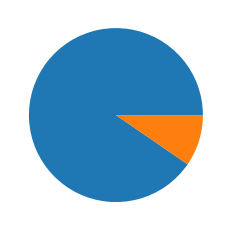

In [29]:
#EDA
plt.pie(train_1.toxic.value_counts(normalize=True))
plt.show()

In [30]:
data_count = train_1.iloc[:,3:].sum()

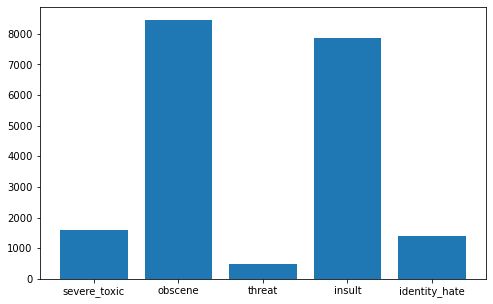

In [31]:
plt.figure(figsize=(8,5))
plt.bar(data_count.index,data_count.values)
plt.show()

In [32]:
train = train_1.copy()
test = test_1.copy()

## Data Preprocessing

In [33]:
#Cnverting the comment_text to lower case.
train['comment_text'] = train['comment_text'].apply(lambda x: x.lower())
test['comment_text'] = test['comment_text'].apply(lambda x: x.lower())

In [34]:
#Remove Punctuation
def remove_punc(text):
  return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)

train['comment_text'] = train['comment_text'].apply(lambda x: remove_punc(x))
test['comment_text'] = test['comment_text'].apply(lambda x: remove_punc(x))

In [35]:
#Removing numbers with letters attach to them
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))
test['comment_text'] = test['comment_text'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))

In [36]:
#Removing '/n '
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub('\n', ' ', x))
test['comment_text'] = test['comment_text'].apply(lambda x: re.sub('\n', ' ', x))

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tf = TfidfVectorizer(stop_words='english')
X_train = tf.fit_transform(train['comment_text'])
X_test = tf.transform(test['comment_text'])

## Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=[]
i=0
for a in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    y = train[a]
    model.append(LogisticRegression(solver='sag'))
    model[i].fit(X_train, y)
    i=i+1

## Prediction

In [45]:
i=0
for a in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print("Column:",a)
    pred_pro = model[i].predict_proba(X_train)[:,1]
    print(pred_pro)
    i=i+1

Column: toxic
[0.01988917 0.00967962 0.05894769 ... 0.02645082 0.01174894 0.04624742]
Column: severe_toxic
[0.00193926 0.00168874 0.00129834 ... 0.00287027 0.00084205 0.00130299]
Column: obscene
[0.00788483 0.00391228 0.01676094 ... 0.01530943 0.00546114 0.01716515]
Column: threat
[0.00147161 0.00149847 0.00089871 ... 0.00139836 0.00084655 0.00212454]
Column: insult
[0.00782021 0.00425036 0.0135526  ... 0.01668016 0.00584211 0.01158838]
Column: identity_hate
[0.00186326 0.00156181 0.00121246 ... 0.00341867 0.00180889 0.00200179]


In [57]:
i=0
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    test[col]=model[i].predict_proba(X_test)[:, 1]
    i=i+1
test

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...,0.988681,0.089809,0.979258,0.014921,0.816939,0.122065
1,0000247867823ef7,from rfc the title is fine as it is imo,0.008418,0.003183,0.005961,0.001698,0.008898,0.003385
2,00013b17ad220c46,sources zawe ashton on lapland —,0.045491,0.004742,0.017638,0.001803,0.022299,0.005301
3,00017563c3f7919a,if you have a look back at the source the info...,0.002690,0.001872,0.002894,0.001041,0.003094,0.000834
4,00017695ad8997eb,i dont anonymously edit articles at all,0.037727,0.002271,0.011800,0.001786,0.014361,0.003440
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but t...,0.032826,0.002430,0.007187,0.001495,0.013061,0.002896
153160,fffd7a9a6eb32c16,throw from out field to home plate does i...,0.058375,0.005351,0.021779,0.003820,0.030664,0.009420
153161,fffda9e8d6fafa9e,okinotorishima categories i see your ...,0.014474,0.002774,0.008818,0.001400,0.010011,0.002703
153162,fffe8f1340a79fc2,one of the founding nations of the eu ge...,0.028042,0.003068,0.015229,0.002144,0.016052,0.013793


## Pickle File

In [59]:
import pickle

In [61]:
pk=open("model.pkl", "wb")
pickle.dump(model,pk)
pickle.dump(tf,pk)